In [259]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

In [260]:
Nx, Ny = 100, 50
et = 10.0

def load(Nx,Ny,et):
    base_fn = 'output_rising_bubble'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

# Truth plotter

2


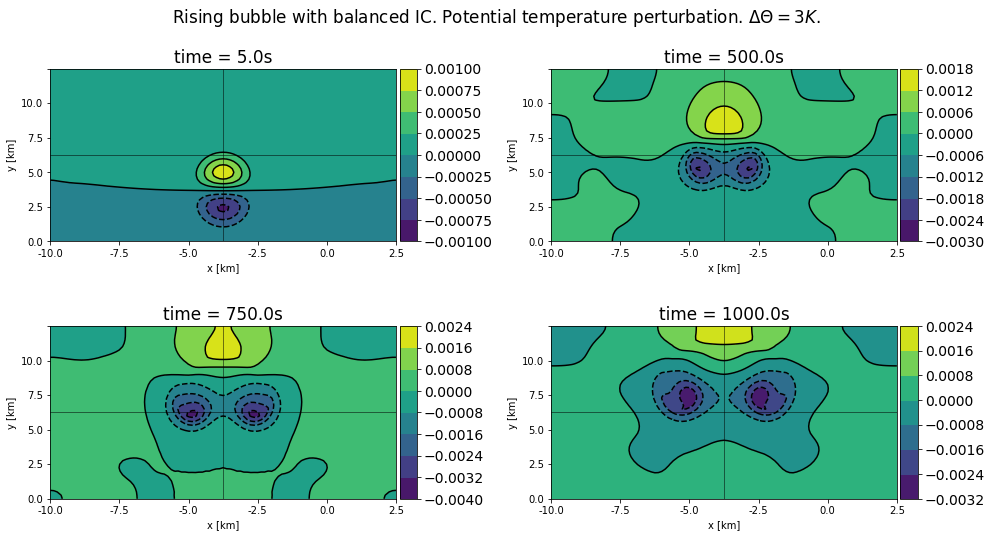

In [261]:
N = 1
sfx = 'comp_delth_perturb_ib_truth'

fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
attributes = ['rhoY', 'rho']
attributes = ['p2_nodes']

times = [0.0,5.0,7.5,10.0]
ltags = ['ic',tags[9],tags[9],tags[9]]
times = [0.05,5.0,7.5,10.0]
ltags = [tags[9],tags[9],tags[9],tags[9]]
# times = [0.0]

ldicts = pt.labels()

t_lbl = 'TIME'
arr_lst = []

class oo(object):
    def __init__(self):
        None
        
oo = oo()

for tt,time in enumerate(times):
    tag = ltags[tt]
    for atr_idx, attribute in enumerate(attributes):
        arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0]
        arr = arr.T
        
        setattr(oo,attribute,arr)
        
#     arr_lst.append([oo.rhoY / oo.rho,"time = %.1fs" %(time*100)])
    arr_lst.append([oo.p2_nodes, "time = %.1fs" %(time*100)])
#     arr_lst.append(oo.p2_nodes)
    
# arr_lst = np.array(arr_lst)
# diff_lst = arr_lst[1:] - arr_lst[:-1]
# arr_lst = [[t_arr,nn] for nn,t_arr in enumerate(diff_lst)]
# print("len",len(arr_lst))
ncolslen = int(len(times) * len(attributes) / 4)
ncolslen = 2
print(ncolslen)
fs = (14,8)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

axes = {
'x_axs' : np.arange(-10.0,12.5,2.5),
'y_axs' : np.arange(0,12.5,2.5),
'x_loc' : np.linspace(0,Nx-1,len(x_axs)),
'y_loc' : np.linspace(0,Ny-1,len(y_axs)),
'x_label' : r'x [km]',
'y_label' : r'y [km]',
'axvline' : Nx/2,
'axhline' : Ny/2,
}

pl.set_axes(**axes)

st = "Rising bubble with balanced IC. Potential temperature perturbation. $\Delta \Theta = 3K$."
_ = pl.plot(aspect='equal',method='contour',suptitle=st)
# pl.save_fig('../img/rb_%s' %sfx)

# Ensemble plotter

obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_cont_blend_fs=1_ts=0
(1, 10, 101, 51)
(101, 51)
5
3


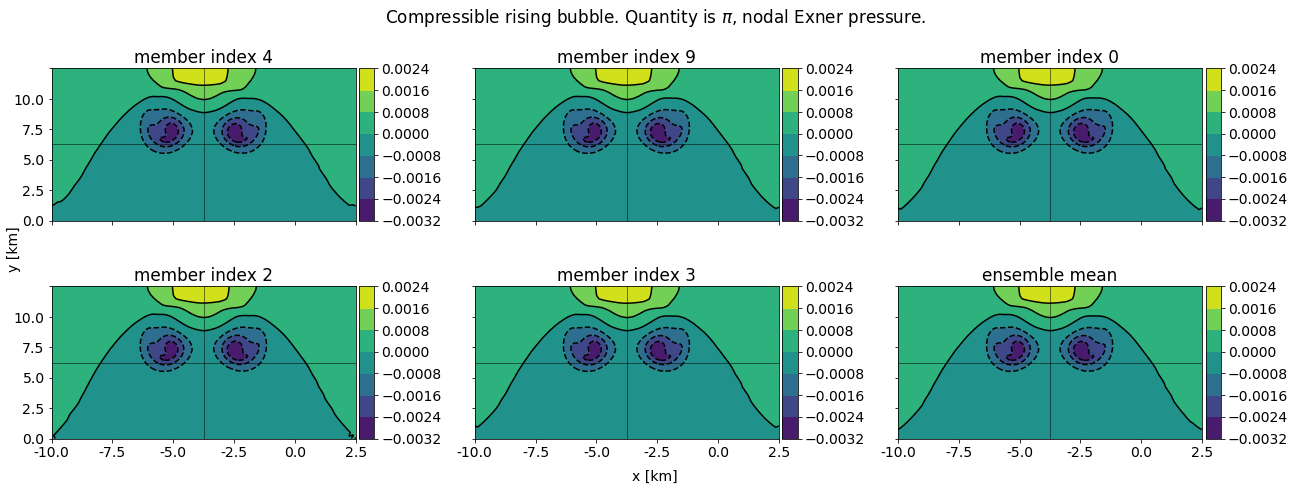

In [251]:
import random

random.seed(444)

N = 10
sfx = "obs_dpib_noda"
# sfx = 'ip'
sfx = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm'
sfx = tc.cb_suffix(1,0, '%s' %(sfx))
# sfx = 'ip_obs_comp_wdawloc_1.0'
# sfx = 'ip_noda'
# sfx = 'noda'
print(sfx)
attribute = 'p2_nodes'
times = [10.0]
# times = [0.1,1.0,2.0]
# times = [0.1,0.2,0.3]

ens = tc.get_ensemble(times, N, attribute, sfx)
print(ens.shape)
mean = np.mean(ens[0],axis=0)
print(np.array(mean).shape)
mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()

for ens_at in ens:
    ncolslen = int((ens_at.shape)[0]/2)
    print(ncolslen)
    fs = (18,7)
#     fs = (14,8)
    
    arr_lst = [[arr.T,'member index %i' %n] for n,arr in enumerate(ens_at)]
    arr_lst = random.sample(arr_lst, k=5)
    arr_lst.append(mean)
    ncolslen = int(len(arr_lst)/2)
    print(ncolslen)
    
    pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs, sharex=True,sharey=True)

    axes = {
    'x_axs' : np.arange(-10.0,12.5,2.5),
    'y_axs' : np.arange(0,12.5,2.5),
    'x_loc' : np.linspace(0,Nx-1,len(x_axs)),
    'y_loc' : np.linspace(0,Ny-1,len(y_axs)),
    'axvline' : Nx/2,
    'axhline' : Ny/2,
    }

    pl.set_axes(**axes)
    
    st = "Compressible rising bubble. Quantity is %s." %attr_labels[attribute]
    _ = pl.plot(aspect='equal',method='contour',suptitle=st)
    pl.fig.text(0.5, 0.04, r'x [km]', ha='center')
    pl.fig.text(0.00, 0.5, r'y [km]', va='center', rotation='vertical')
#     pl.save_fig('../img/rb_ens_%s' %sfx)

# Localisation Functions

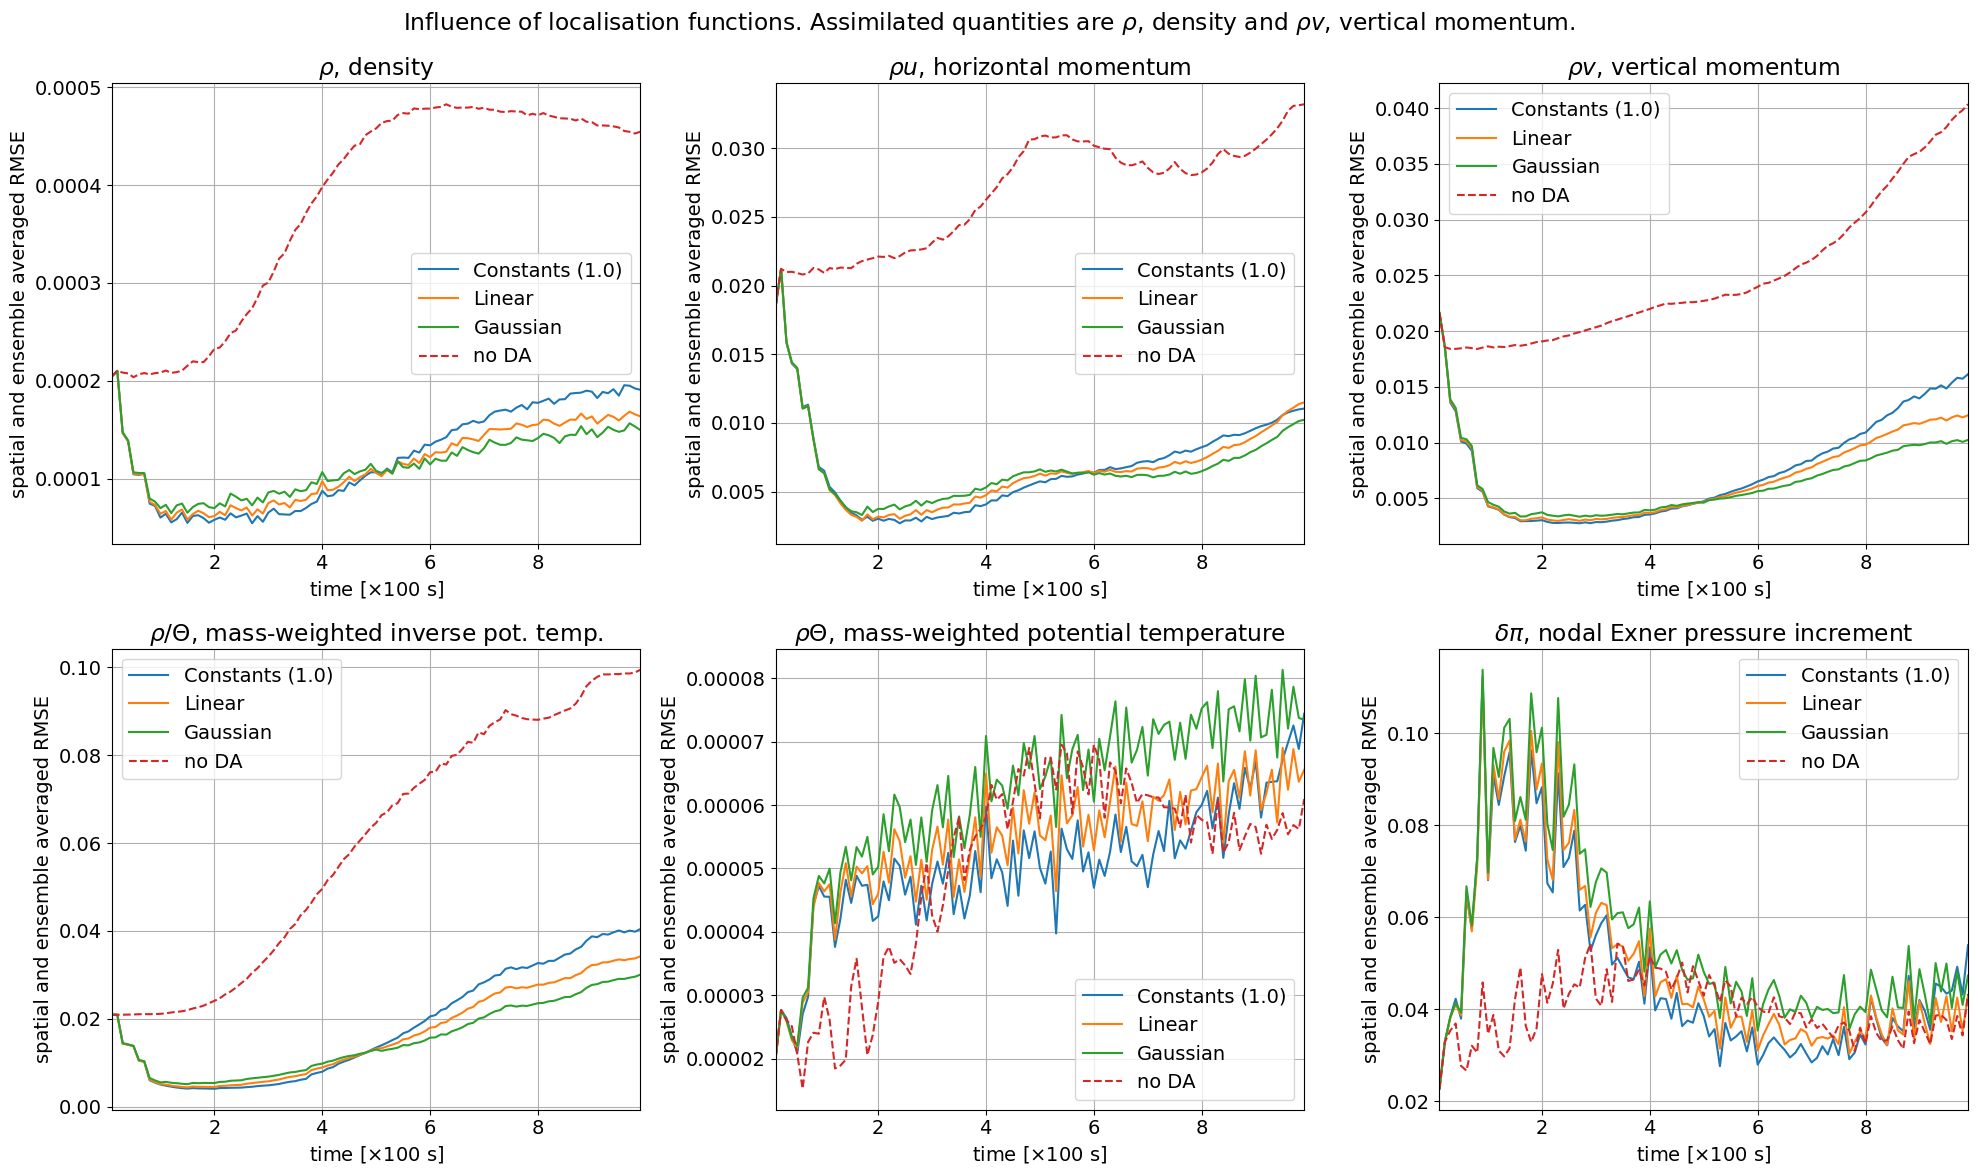

In [49]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_loc_funcs'
title = 'Influence of localisation functions'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'obs_dpib_noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_constants_nonorm'
    ens_1_label = r'Constants (1.0)'
    
    ens_2_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_linear_nonorm'
#     ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_2_suffix))
    ens_2_label = r'Linear'

    ens_3_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_gaussian_nonorm'
    ens_3_label = r'Gaussian'
    
    ens_4_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11bt'
    ens_4_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,1.2)

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
#     ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'comp_delth_perturb_ib_truth', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
#         diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
#     ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s.pdf' %(fn))
plt.show()

# Subdomain size

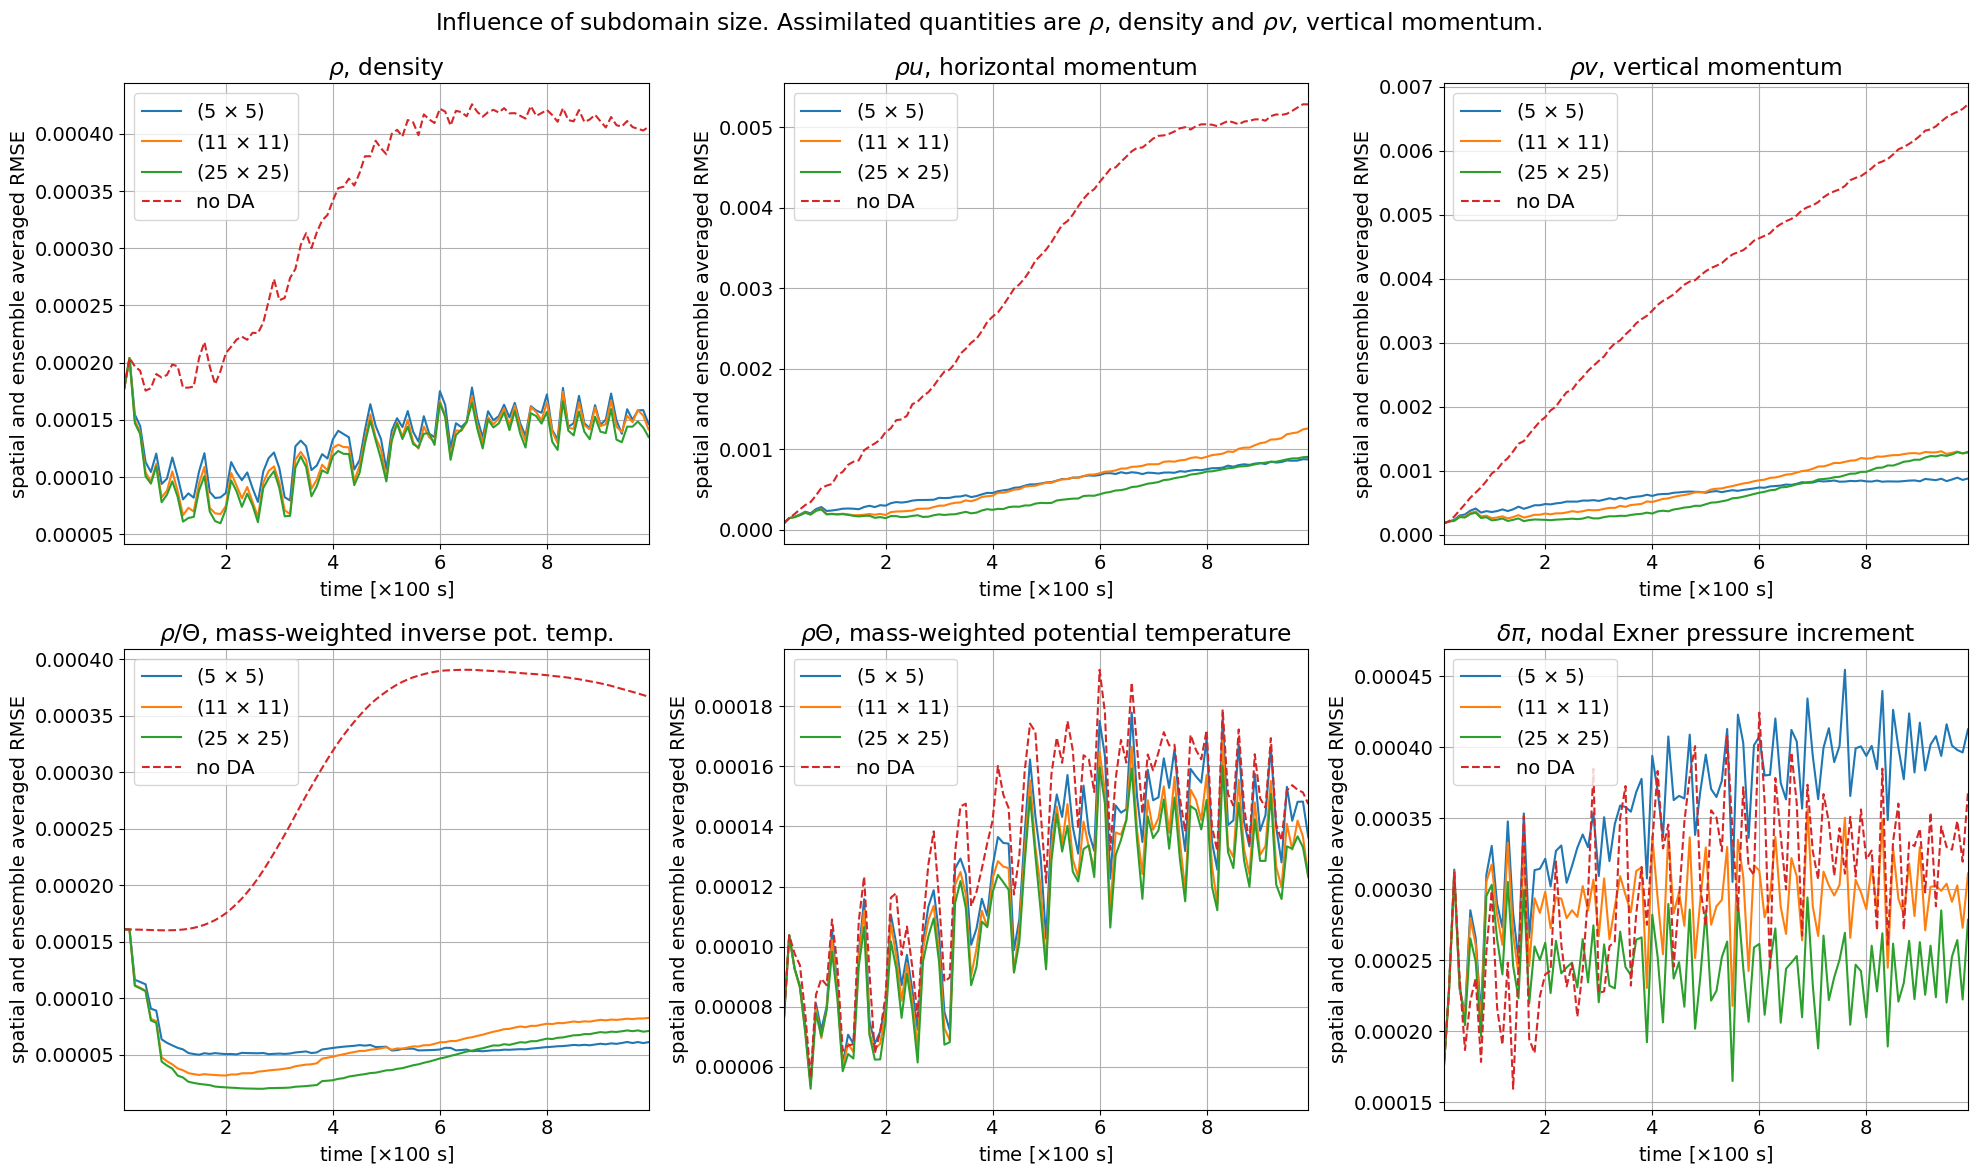

In [170]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_subdomain_size'
title = 'Influence of subdomain size'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=False, diff=diff)

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'obs_dpib_noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_5by5_nonorm'
    ens_1_label = r'(%i $\times$ %i)' %(5,5)
    
    ens_2_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm'
#     ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_2_suffix))
    ens_2_label = r'(%i $\times$ %i)' %(11,11)

    ens_3_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_25by25_nonorm'
    ens_3_label = r'(%i $\times$ %i)' %(25,25)
    
#     ens_4_suffix = 'obs_dpib_wdawloc_1.0_rhov_rhoY_full'
    ens_4_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,1.2)

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
#     ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'comp_delth_perturb_ib_truth', label_type='TIME',avg=False, diff=diff)
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_delth_perturb_truth', label_type='TIME',avg=False, diff=diff)

    ax = pl.get_ax(i)
    
    avg = True

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
#         diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
#         diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
#     ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s.pdf' %(fn))
plt.show()

# Observation Noise

(99, 1, 100, 50)
(99, 1, 100, 50)
(99, 1, 100, 50)
(99, 1, 100, 50)
(99, 1, 100, 50)
(99, 1, 101, 51)


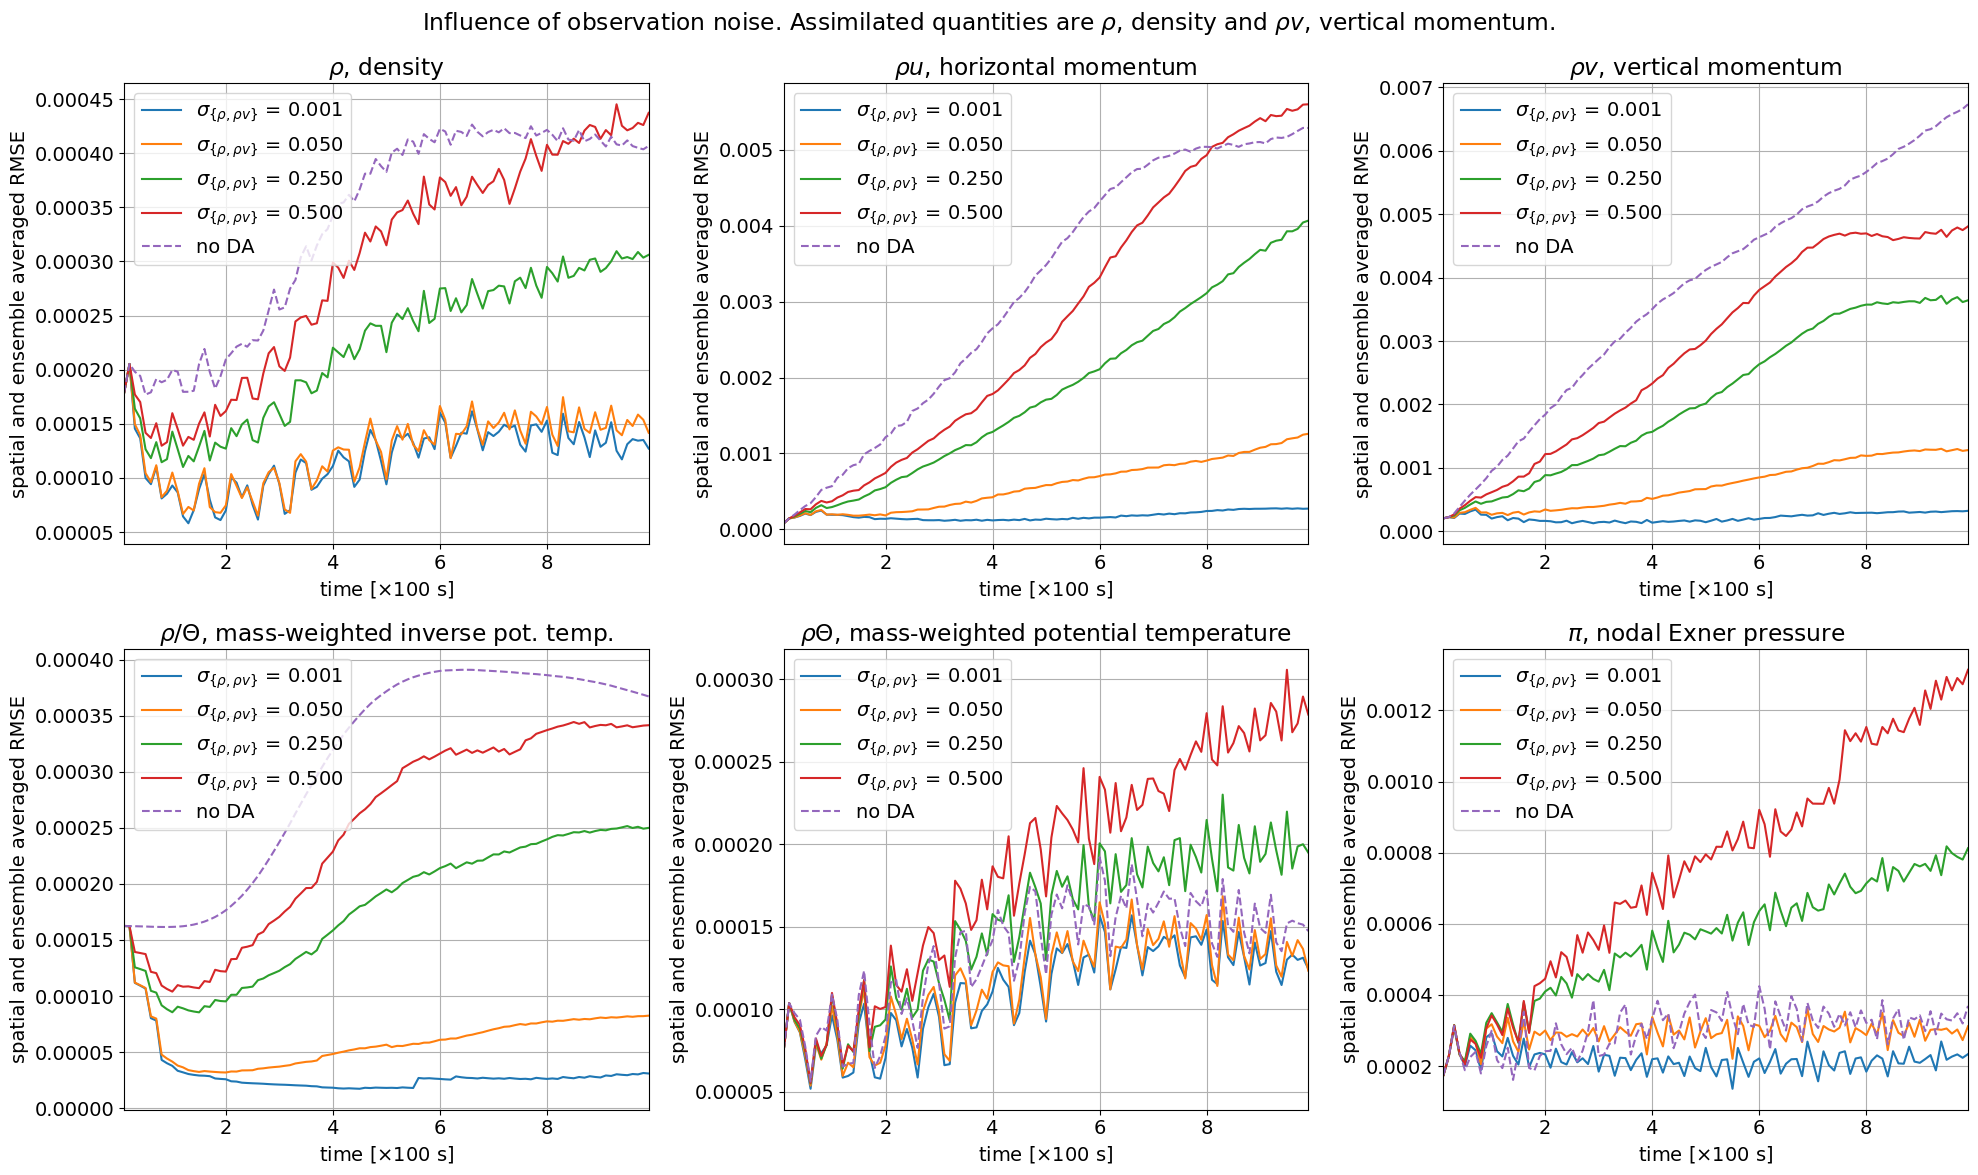

In [167]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_obs_noise'
title = 'Influence of observation noise'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=False, diff=diff)

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'obs_dpib_noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nobs_0.001_nonorm'
    ens_1_label = r'$\sigma_{\{\rho, \rho v\}}$ = %.3f' %(0.001)
    
    ens_2_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nobs_0.05_nonorm'
    ens_2_label = r'$\sigma_{\{\rho, \rho v\}}$ = %.3f' %(0.05)

    ens_3_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nobs_0.25_nonorm'
    ens_3_label = r'$\sigma_{\{\rho, \rho v\}}$ = %.3f' %(0.25)
    
    ens_4_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nobs_0.50_nonorm'
    ens_4_label = r'$\sigma_{\{\rho, \rho v\}}$ = %.3f' %(0.50)

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'comp_delth_perturb_ib_truth', label_type='TIME',avg=True, diff=diff)
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_delth_perturb_truth', label_type='TIME',avg=False, diff=diff)
    print(psinc.shape)
    
    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
    ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s.pdf' %(fn))
plt.show()

# Observation Sparsity

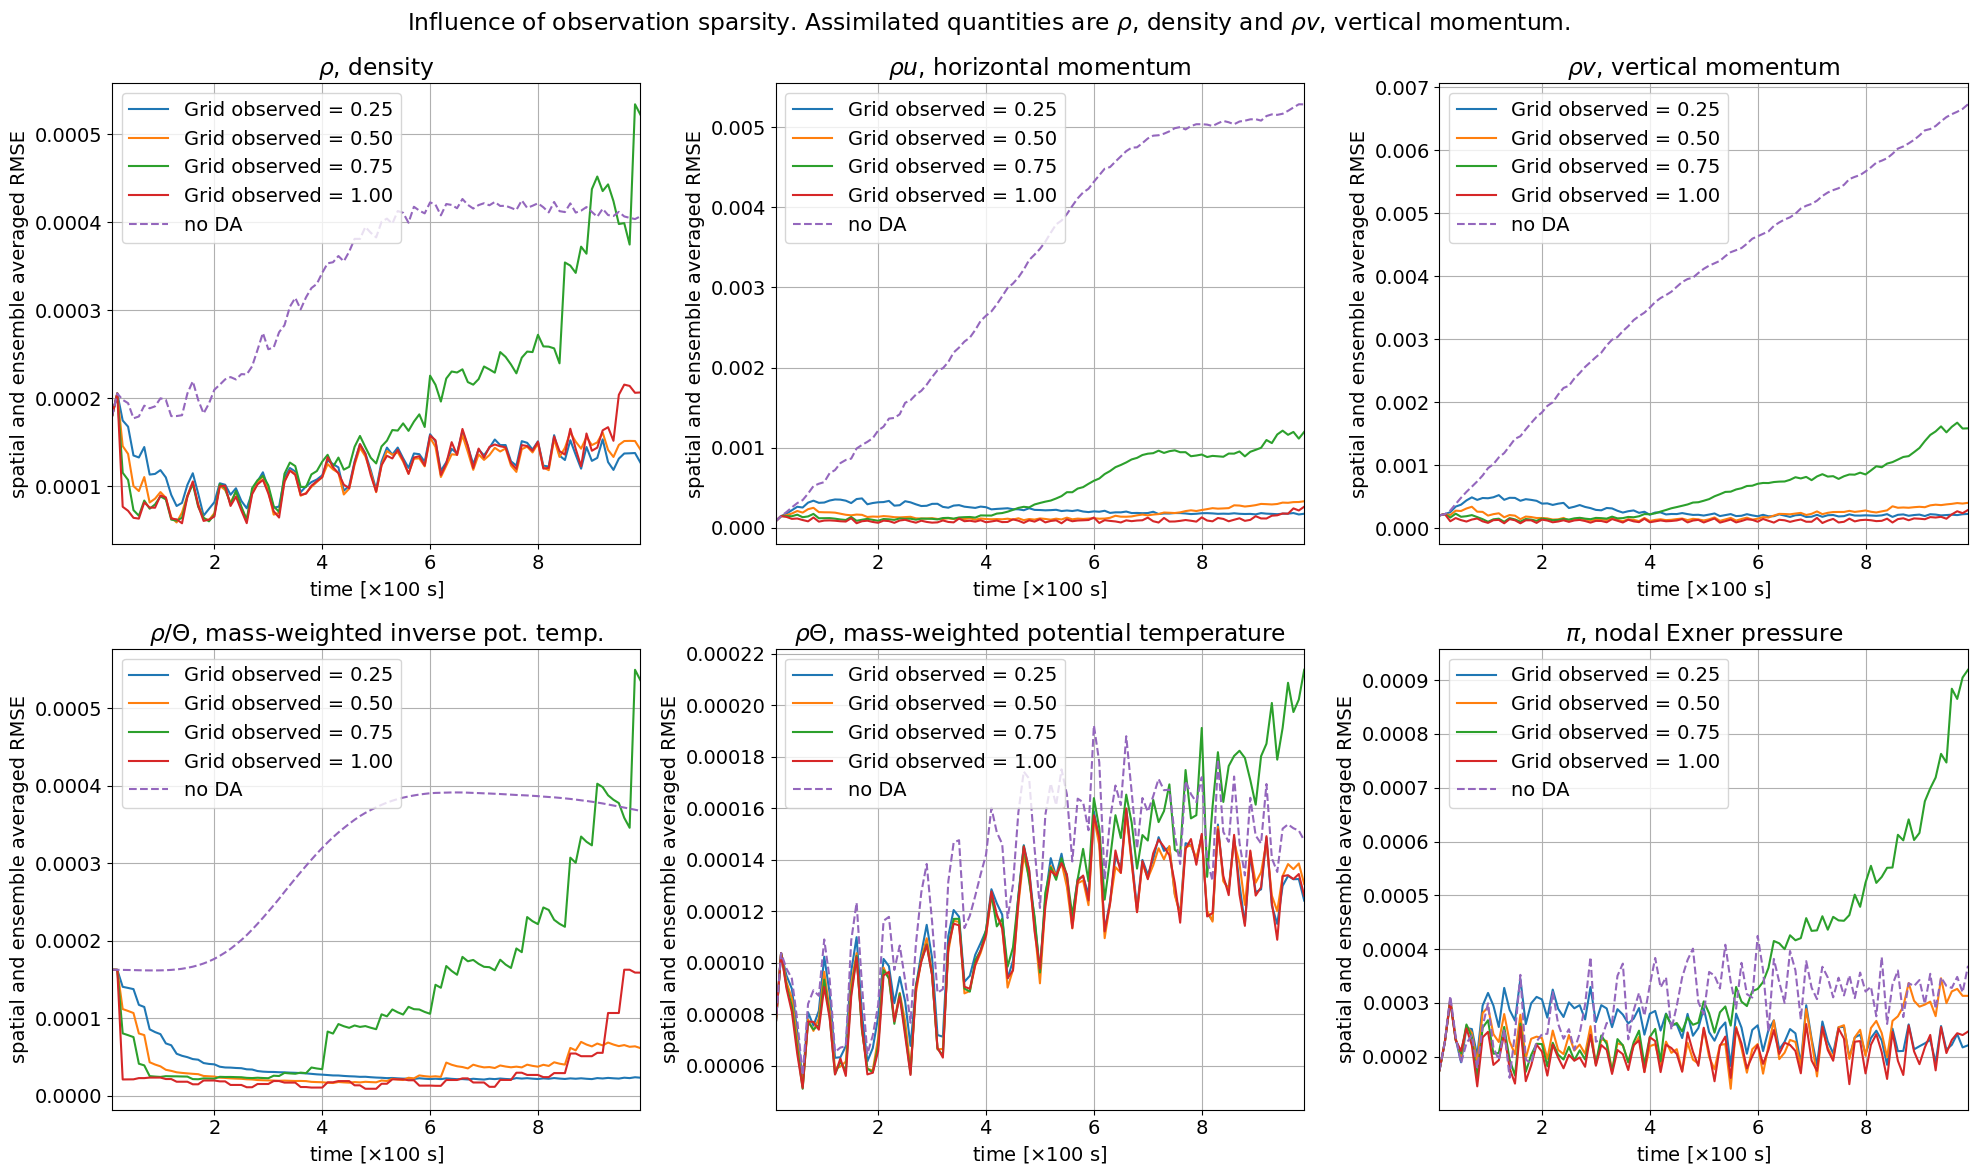

In [168]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_obs_sparsity'
title = 'Influence of observation sparsity'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=False, diff=diff)

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'obs_dpib_noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_sobs_0.25_nonorm'
    ens_1_label = r'Grid observed = %.2f' %(0.25)
    
    ens_2_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_sobs_0.50_nonorm'
    ens_2_label = r'Grid observed = %.2f' %(0.50)

    ens_3_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_sobs_0.75_nonorm'
    ens_3_label = r'Grid observed = %.2f' %(0.75)
    
    ens_4_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_sobs_1.00_nonorm'
    ens_4_label = r'Grid observed = %.2f' %(1.00)

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'comp_delth_perturb_ib_truth', label_type='TIME',avg=True, diff=diff)
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_delth_perturb_truth', label_type='TIME',avg=False, diff=diff)
#     print(psinc.shape)
    
    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
    ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s.pdf' %(fn))
plt.show()

# Flow field animator

Import data and reorder it for animation.

In [145]:
import random
random.seed(444)

N = 10
sfx = 'obs_dpib_noda'
# sfx = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm'
# sfx = tc.cb_suffix(1,0, '%s' %(sfx))

times = np.arange(0.0,10.05,0.05)[1:]
tag = tags[9]

attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
attr_labels = pt.labels()

class oo(object): pass
ens_time_series = np.empty((len(times),N+1),dtype='object')

print(ens_time_series.shape)

# fill ens_time_series with all time and attributes output.
for aa,attribute in enumerate(attributes):
    ens = tc.get_ensemble(times, N, attribute, sfx, tag=tag, inner=True)
    for tt,ens_at_time in enumerate(ens):
        mean = np.mean(ens_at_time,axis=0)
        mean = mean.T
        for nn,mem in enumerate(ens_at_time):
            if aa == 0:
                ens_time_series[tt,nn] = oo()
            arr = mem.T
            setattr(ens_time_series[tt,nn],attribute,arr)
        if aa == 0:
            ens_time_series[tt,nn+1] = oo()
        setattr(ens_time_series[tt,nn+1],attribute,mean)

# calculate Y, potential temperature perturbation, for each time and each ensemble member.
for tt,ens_at_time in enumerate(ens_time_series):
    for nn,mem in enumerate(ens_at_time):
        Y = mem.rhoY / mem.rho
        setattr(mem,'Y',Y)

(200, 11)


Plot Y

In [146]:
plot = False

arrs = np.empty((ens_time_series.shape[0],N+1,2), dtype='object')
attr_labels = pt.labels()
attr = 'p2_nodes'

for tt,ens_at_time in enumerate(ens_time_series):
    for nn,mem in enumerate(ens_at_time):
        if nn == 10:
            label = '%s for ens. mean' %attr_labels[attr]
        else:
            label = '%s for mem %i' %(attr_labels[attr], nn)
        arrs[tt,nn] = [getattr(mem,attr), label]

if plot == True:
    for tt,time in enumerate(times):
        fs = (22,10)
        pl = pt.plotter(arrs[tt],ncols=4,figsize=fs,sharey=False)

        x_axs = [-0.5,0.0,0.5]
        y_axs = [-0.5,0.0,0.5]
        x_loc = np.linspace(0,Nx-1,3)
        y_loc = np.linspace(0,Ny-1,3)
        x_label = r'x [km]'
        y_label = r'y [km]'
#         st = 'SWE shear flow (%ix%i), $\Delta t = 12s$. Potential vortcity in the (x-z) plane.' %(Nx,Nz)
#         st = '(%ix%i), %s' %(Nx,Nz, sfx)

        pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
        _ = pl.plot(aspect='equal',method='contour')

Animate the ordered arrays

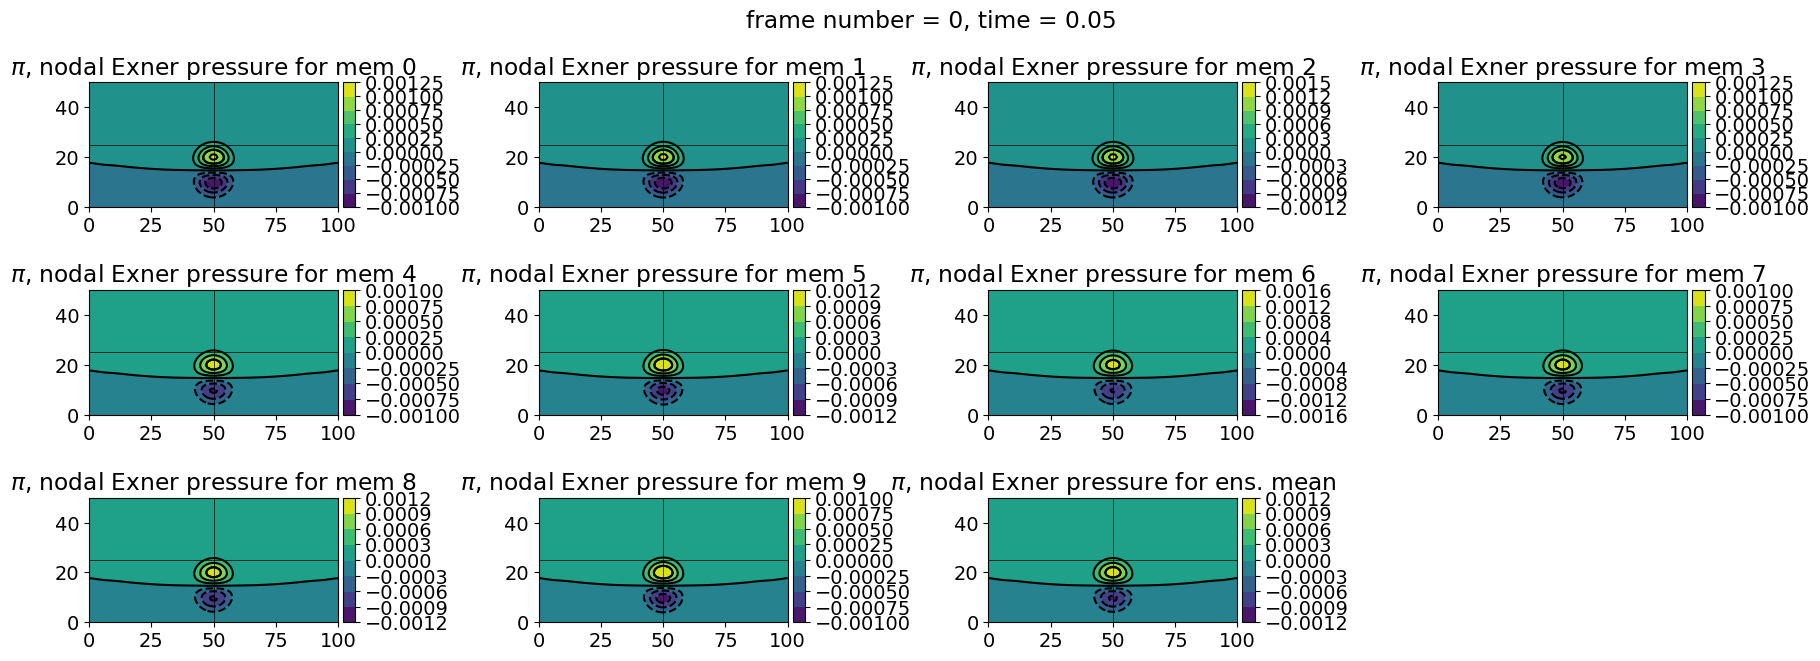

In [147]:
def title_gen(frn):
    return "frame number = %i, time = %.2f" %(frn, times[frn])

a2d = pt.animator_2D(arrs,ncols=4,figsize=fs)
a2d.suptitle = title_gen
a2d.method = 'contour'
anim = a2d.animate(interval=350, aspect='equal', method='contour')

Output the animation

In [148]:
import matplotlib.animation as animation

Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Ray Chew'), bitrate=6000)
anim.save('rb_ens_%s_%s.mp4' %(attr,sfx), writer=writer)

# Decoupling of fast and slow modes

obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_cont_blend_fs=1_ts=0
obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_cont_blend_fs=1_ts=0
obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_cont_blend_fs=1_ts=0
obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_cont_blend_fs=1_ts=0
obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_cont_blend_fs=1_ts=0
obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_cont_blend_fs=1_ts=0


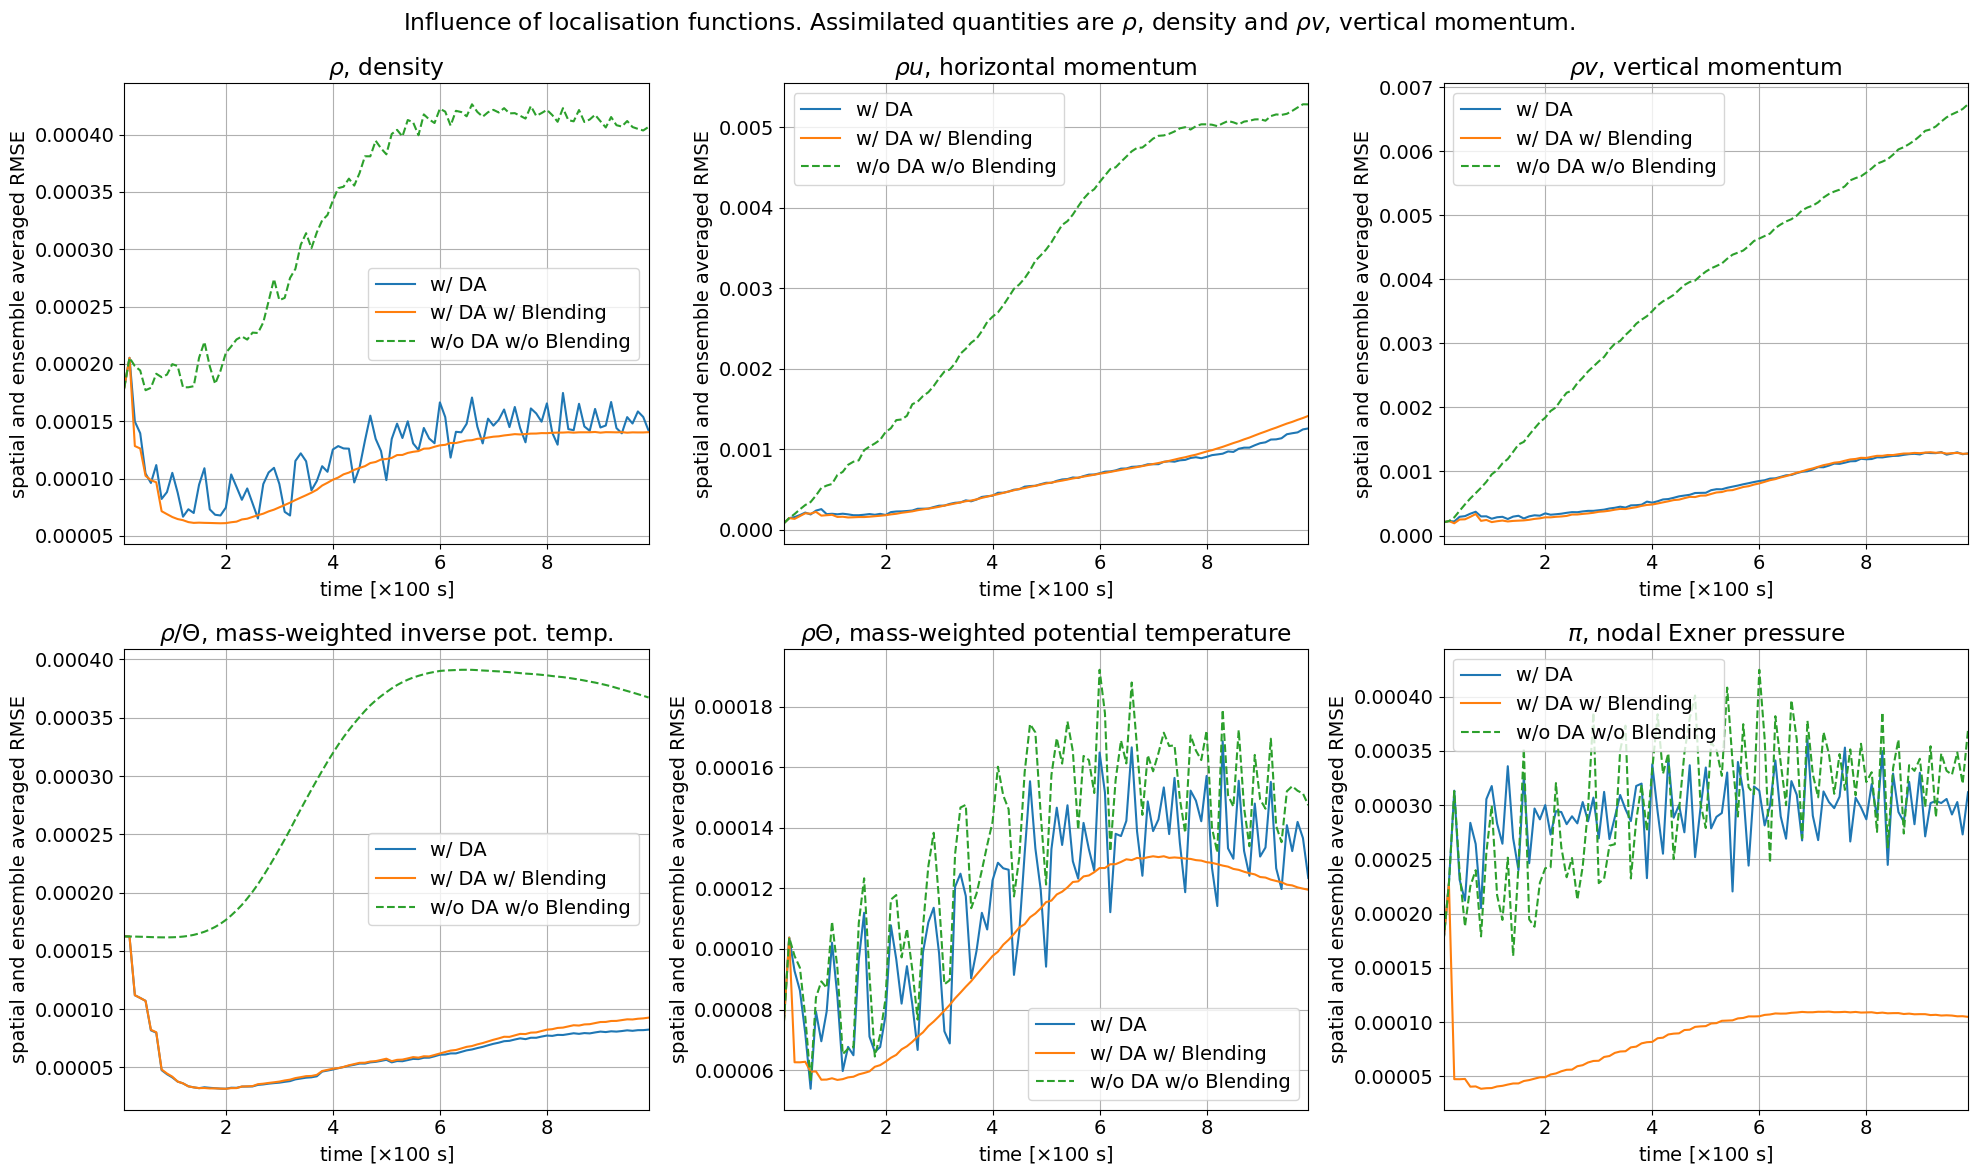

In [164]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_loc_funcs'
title = 'Influence of localisation functions'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=False, diff=diff)

for i,attribute in enumerate(attributes):
    diff = False if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'obs_dpib_noda'
    ens_noda_label = 'w/o DA w/o Blending'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm'
    ens_1_label = r'w/ DA'
    
    ens_2_suffix = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm'
    ens_2_suffix = tc.cb_suffix(1,0, '%s' %(ens_2_suffix))
    print(ens_2_suffix)
    ens_2_label = r'w/ DA w/ Blending'

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_delth_perturb_truth', label_type='TIME',avg=False, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rho'], attr_labels['rhov']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
# plt.savefig('%s.pdf' %(fn))
plt.show()

3


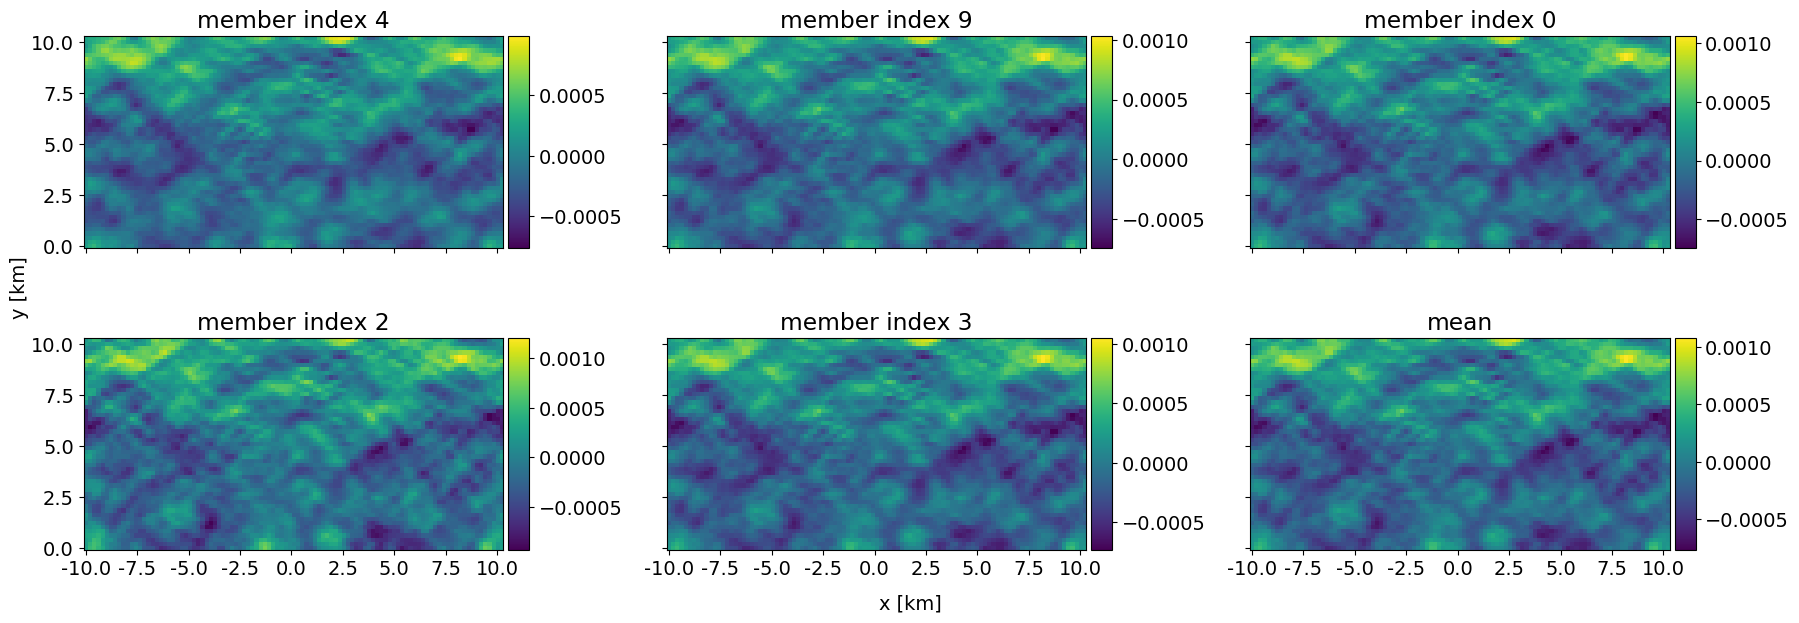

In [200]:
import random

random.seed(444)

N = 10
sfx0 = "obs_dpib_noda"
sfx1 = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm'
sfx2 = tc.cb_suffix(1,0, '%s' %(sfx1))

attribute = 'p2_nodes'
times = [7.5]
# times = [0.1,1.0,2.0]
# times = [0.1,0.2,0.3]

def get_mean(ens):
    return np.mean(ens[0],axis=0)

ens_noda = tc.get_ensemble(times, N, attribute, sfx0)
ens_wda = tc.get_ensemble(times, N, attribute, sfx1)
ens_wdab = tc.get_ensemble(times, N, attribute, sfx2)

enses = [ens_noda,ens_wda,ens_wdab]
means = []
for ens in enses:
    means.append(get_mean(ens))

# mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()
fs = (18,7)

for tt in range(len(times)):
    idx1 = 2
    idx2 = 1

    arr_lst = [[(arr1-arr2).T,'member index %i' %n] for n,(arr1,arr2) in enumerate(zip(enses[idx1][tt],enses[idx2][tt]))]
    arr_lst = random.sample(arr_lst, k=5)
    arr_lst.append([(means[idx1] - means[idx2]).T,'mean'])
    ncolslen = int(len(arr_lst)/2)
    print(ncolslen)

pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs, sharex=True,sharey=True)

x_axs = np.arange(-10.0,12.5,2.5)
y_axs = np.arange(0,12.5,2.5)
x_loc = np.linspace(0,Nx-1,len(x_axs))
y_loc = np.linspace(0,Ny-1,len(y_axs))

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs)#, x_label=x_label, y_label=y_label)
st = "(Ens. w/ DA w/ Blending) - (Ens. w/ DA w/o Blending). Quantity is %s." %attr_labels[attribute]
_ = pl.plot(aspect='equal',method='imshow')
pl.fig.text(0.5, 0.04, r'x [km]', ha='center')
pl.fig.text(0.00, 0.5, r'y [km]', va='center', rotation='vertical')
pl.save_fig('decoupling_fast_slow_modes_%.1f' %times[0])